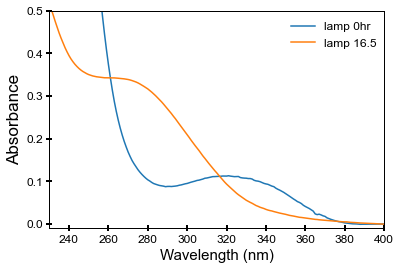

In [13]:
import os
###########################EVERYTHING YOU NEED TO CHANGE
os. chdir("/Users/timmo/Documents/RAPFLAB/TM/210629/HAH/lamp") #sets working directory
header_length=19
FooterLength=44 #sets how many rows to skip at the bottom. For Trough data can probably just use 0 or 1 and it should work.
TotalTime= "16hr" #How many hours did the photolysis run for. This is used for generating an automatic legend
XLabel="Wavelength (nm)" #sets x axis label for graph later on
YLabel="Absorbance" #sets y axis label for graph later on
FileType = "csv" #pick from "xlsx" or "csv"
OutputDir = "/Users/timmo/Documents/RAPFLAB/TM/210629/HAH/lamp"
OutputName = "name" #name of the file (will save in directory specified above)
###Maybe change 
NumBaselineAverage = 100 #number of points to average to get baseline correction
StartBaselinePoint = 10 #starting point for correction -- not wavelength, but should correspond to ~550/600 nm
post="16.5" #sets post to however many hours it was
##################################












import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
import glob
import statistics


files = sorted(glob.glob("*"+FileType))
files.sort(key=os.path.getmtime)
XAxis=[]
YAxis=[] #creates to empty sets where the x and y values of all documents will be appended for later graphing
legendNames=[]
NamePic=[]

N_files=(len(files))
for entry in range(len(files)):
    name = files[entry]
    if FileType == "csv":
        CurrFile = pd.read_csv(files[entry],skiprows = header_length, skipfooter=FooterLength, engine='python')#sets amount of lines to skip at beginning and end of a document
        CurrFile.columns=["Wavelength","Absorbance"]
        #XAxis.append(CurrFile["Wavelength"])
        #YAxis.append(CurrFile["Absorbance"])
        
############################OFFSET MATH###############
        YAverage=[]
        #print(YAverage)
        YAverage = CurrFile["Absorbance"][StartBaselinePoint:StartBaselinePoint+NumBaselineAverage]
        #XAverage = CurrFile["Wavelength"][100:110]
        #print(XAverage)
        RefMean = YAverage.mean()
        
        CurrFile["CorrectedAbsorbance"] = CurrFile["Absorbance"]-RefMean
        #print(CurrFile.head())
        #print(RefMean)
        #print(YAverage)
        
        XAxis.append(CurrFile["Wavelength"])
        YAxis.append(CurrFile["CorrectedAbsorbance"])
        
#         IndFile = pd.DataFrame(columns = ["Wavelength","CorrectedAbsorbance"])
#         IndFile["Wavelength"]=CurrFile["Wavelength"]
#         IndFile["CorrectedAbsorbance"]=CurrFile["CorrectedAbsorbance"]
#         IndFile.to_csv("/Users/timmo/Documents/RAPFLAB/TM/210629/2/"+str(entry)+"Processed.csv")
#IF YOU WANT TO USE PROCESSED FILE
#######################################################    
        
        
        
        FullSplit = name.split("_") #gets all parts of the file name
        legendNames.append(FullSplit[3]+" "+FullSplit[2])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time)
        NamePic.append(FullSplit[0]+FullSplit[1])
        if legendNames[entry] == 'pre': #this script replaces "pre" with 0hr
            legendNames.pop(0) #removes first (may be pre if early otherwise will be 0hr)
            legendNames.append("0hr") #appends the value of "0 hr", replacing "pre"
            
        elif legendNames[entry] == '*'+'post': #this script replaces post with a user inputted time of the total photolysis
            legendNames.pop() #removes last entry (will be post in this case)
            legendNames.append(TotalTime) #appends the value of total time, replacing post
            
        else:
            continue #if everything is normal, continues
        
    #reads all files in given folder if they are csv and appends wavelength and Absorbance to XAxis and YAxis dataframes
    
  
    elif FileType == "xlsx":   #if file is not csv but is xlsx it goes through this function instead
        #CompFile = files[entry]
        #print(CompFile)
        CurrFile = pd.read_excel(files[entry],skiprows = header_length, skipfooter=FooterLength, engine='python')#sets amount of lines to skip at beginning and end of a document
        CurrFile.columns=["Wavelength","Absorbance"]
        XAxis.append(CurrFile["Wavelength"])
        YAxis.append(CurrFile["Absorbance"])
        
        FullSplit = name.split("_") #gets all parts of the file name
        legendNames.append(FullSplit[1])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time)
        NamePic.append(FullSplit[0]+FullSplit[1])
        if legendNames[entry] == 'pre': #this script replaces "pre" with 0hr
            legendNames.pop(0) #removes first (may be pre if early otherwise will be 0hr)
            legendNames.append("0hr") #appends the value of "0 hr", replacing "pre"
            
        elif legendNames[entry] == 'post': #this script replaces post with a user inputted time of the total photolysis
            legendNames.pop() #removes last entry (will be post in this case)
            legendNames.append(TotalTime) #appends the value of total time, replacing post
            
        else:
            continue #if everything is normal, continues
    #reads all files in given folder if they are xlsx and appends wavelength and Absorbance to XAxis and YAxis dataframes
def FigStyle(): #axis will be shared
#     cmaps['Sequential (2)'] = [
#             'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
#             'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
#             'hot', 'afmhot', 'gist_heat', 'copper']

    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    plt.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.spines.right'] = True
    mpl.rcParams['axes.spines.top'] = True
    plt.axis(xmin=230,xmax=400)
    plt.axis(ymin=-.01, ymax=0.5)
    
    mpl.rcParams['xtick.top']=False
    mpl.rcParams['ytick.right']=False
    ax.tick_params(direction='inout')
    ax.tick_params('both', length=6, width=2, which='major')
    ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.01, 1)) #creates legend and specifies location + formatting
   
    plt.xlabel(XLabel, size=15) #x axis label
    plt.ylabel(YLabel, size=17) #y axis label
    
    #ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.02, 1)) #creates legend and specifies location + formatting

    
    plt.savefig(OutputDir+"/"+OutputName+".png", dpi=300, transparent=False) 
    plt.show() #shows the final plot
    

    #sets basic formatting for our plot

fig, ax = plt.subplots(sharex =True , sharey= True, figsize=(6,4))
for i in range(len(XAxis)):
    x= XAxis[i]
    y= YAxis[i] #plots the x and y values of each dataframe individually on a shared axis
    plt.plot(x, y) #actually plots our graph


FigStyle();  
plt.show() #shows the final plot